In [1]:
!pip install bs4

In [85]:
from bs4 import BeautifulSoup
import requests

In [92]:
html_text=requests.get('https://misbar.com/factcheck').text

In [80]:
soup=BeautifulSoup(html_text,'lxml')

In [81]:
headlines=soup.find_all("div", class_="list_description")

In [82]:
for headline in headlines:
    news=headline.find("h3").a.text
    print(news)


Has this Chinese man spoiled Valentine's Day for lovers by booking all two seats that next to each other at the cinema?


This Photo Isn’t of Assad’s Cousin Hafez Makhlouf


Footage Doesn’t Show Iranian Navy “Friendly Fire” Incident


Did Putin Wear a Hazmat Suit in Meeting with Russian Officials?


Did Mohamed Salah Send Boot, T-Shirt to Syrian Child Whose Leg Was Amputated?


RT, Al-Hadath Spread Misinformation on M4 Road in Idlib


This Video Does Not Show Turkish Troops Targeting Assad Regime Positions


Al-Jazeera, Al-Arabiya Spread Misinformation on Assad's Forces Advances in Aleppo


Did German Protesters Recently Call For Bringing Refugees from Syria’s Idlib?


Man in This Photo Isn’t Syrian


This Man Isn't the Victim Killed by Husband of Lebanese Singer Nancy Ajram


Iran’s Fars News Agency and RT Fabricate Video of Targeting U.S. Base in Iraq


None of These Videos Show Assassination of Iran’s Sulaimani


4 Civilians Killed by Opposition Forces in the Northern Raqqah Countr

### MISBAR DATA USING SELENIUM

In [95]:
!pip install selenium

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.25.0 requires urllib3<1.27,>=1.21.1, but you have urllib3 2.0.7 which is incompatible.


  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
  Attempting uninstall: certifi
    Found existing installation: certifi 2020.12.5
    Uninstalling certifi-2020.12.5:
      Successfully uninstalled certifi-2020.12.5


In [103]:
!pip install webdriver_manager

  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [119]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Setup
s = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=s)

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
import time

# Initialize webdriver
driver = webdriver.Chrome()

driver.get("https://misbar.com/factcheck")

# Scraping function
def scrape_articles():
    articles = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CLASS_NAME, 'factcheck-item'))
    )
    scraped_data = []
    for article in articles:
        title_element = article.find_element(By.CLASS_NAME, 'card-title')
        title = title_element.text
        category = article.find_element(By.CLASS_NAME, 'category-type').text
        legitimacy = article.find_element(By.CLASS_NAME, 'classification').text
        if legitimacy in ["صحيح", "زائف","مفبرك","خطأ شنيع","حقيقي","مزيف"]:
            if legitimacy in ["زائف","مفبرك","خطأ شنيع","مزيف"]:
                legitimacy="زائف"
            scraped_data.append([title, category, legitimacy])
        #scraped_data.append([title, category, legitimacy])
    return scraped_data

# Clicks load more button, to load more articles for scraping
def click_load_more():
    try:
        load_more_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, 'load-more'))
        )
        driver.execute_script("arguments[0].scrollIntoView(true);", load_more_button)
        time.sleep(3)
        #load_more_button.click()
        driver.execute_script("arguments[0].click();", load_more_button)
        return True
    except:
        return False

# retrive all the categories // of articles
filter_categories = WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'dropdown-item'))
)

# Go through all except the first (All) which is a mixture of all the categories
for category in filter_categories[1:]: 
    category_text = category.text
    driver.execute_script("arguments[0].scrollIntoView(true);", category)
    time.sleep(1)
    driver.execute_script("arguments[0].click();", category)
    
    # Wait for the first article to change to confirm the page has updated
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'factcheck-item'))
    )
    # Allow additional time for the full list to load
    time.sleep(2)  
    
    # Scrape
    scraped_data = scrape_articles()

    # click loadmore 100 times for each category
    for _ in range(100):
        
        if not click_load_more():
            break
        # Wait for more articles to load
        time.sleep(2)  
        scraped_data.extend(scrape_articles())

    with open(f'{category_text}_articles.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Article', 'Topic', 'Legitimacy'])
        writer.writerows(scraped_data)

driver.quit()


In [13]:
import pandas as pd
import os

# Get the current working directory
directory = os.getcwd()

# List to hold dataframes
dfs = []

# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read CSV file into a dataframe
        df = pd.read_csv(os.path.join(directory, filename))
        # Append dataframe to the list
        dfs.append(df)

# All dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

# Combined dataframe to a new CSV file
combined_df.to_csv('final_fake_news_detection_arabic_dataset.csv', index=False)


### STATISTICS

In [14]:
df_for_stats=pd.read_csv("final_fake_news_detection_arabic_dataset.csv")

In [15]:
df_for_stats.head()

,Article,Topic,Legitimacy
0,الصورة مفبركة وليست لكسوف الشمس في البرتغال حد...,أخبار,زائف
1,الصورة مفبركة وليست لكسوف الشمس في البرتغال حد...,أخبار,زائف
2,الصورة مفبركة وليست لكسوف الشمس في البرتغال حد...,أخبار,زائف
3,الفيديو قديم وليس لمظاهرة ضد آل سعود في جامعة ...,أخبار,زائف
4,الصورة مفبركة وليست لكسوف الشمس في البرتغال حد...,أخبار,زائف


In [16]:
df_for_stats.tail()

,Article,Topic,Legitimacy
37779,لم يعزف أندريه ريو موسيقى فيلم الرسالة,موسيقى,زائف
37780,لم يعزف ياني موسيقى رأفت الهجَّان,موسيقى,زائف
37781,وفاة الفنانة فيروز.. خبر زائف,موسيقى,زائف
37782,مايكل جاكسون يغني للحج.. حقيقة الفيديو,موسيقى,زائف
37783,دورة في الرقص الشرقي لفيفي عبده في السعودية.. ...,موسيقى,زائف


#### NUMBER OF ARTICLES

In [17]:
df_for_stats.describe()

,Article,Topic,Legitimacy
count,37784,37784,37784
unique,1069,8,2
top,لا صحة لخبر وفاة المدرب البرازيلي جورفان فييرا,رياضة,زائف
freq,125,16984,36986


In [18]:
df_for_stats.shape

(37784, 3)

#### DISTRIBUTION ACROSS TOPICS

In [20]:
df_for_stats["Topic"].describe()

count     37784
unique        8
top       رياضة
freq      16984
Name: Topic, dtype: object

In [22]:
import matplotlib.pyplot as plt

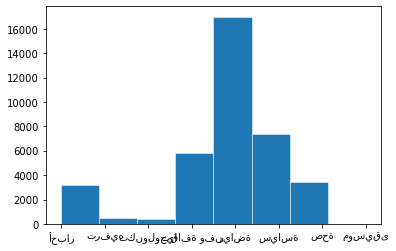

In [41]:
fig, ax=plt.subplots()

ax.hist(df_for_stats["Topic"], bins=8, linewidth=0.5, edgecolor="white")

plt.show()

In [45]:
topic_count=df_for_stats.groupby("Topic").size()
print(topic_count)

Topic
أخبار         3156
ترفيه          501
تكنولوجيا      405
ثقافة وفن     5841
رياضة        16984
سياسة         7410
صحة           3458
موسيقى          29
dtype: int64
